# 1.4.15 Image Segmentation with Watershed Algorithm

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('coins2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

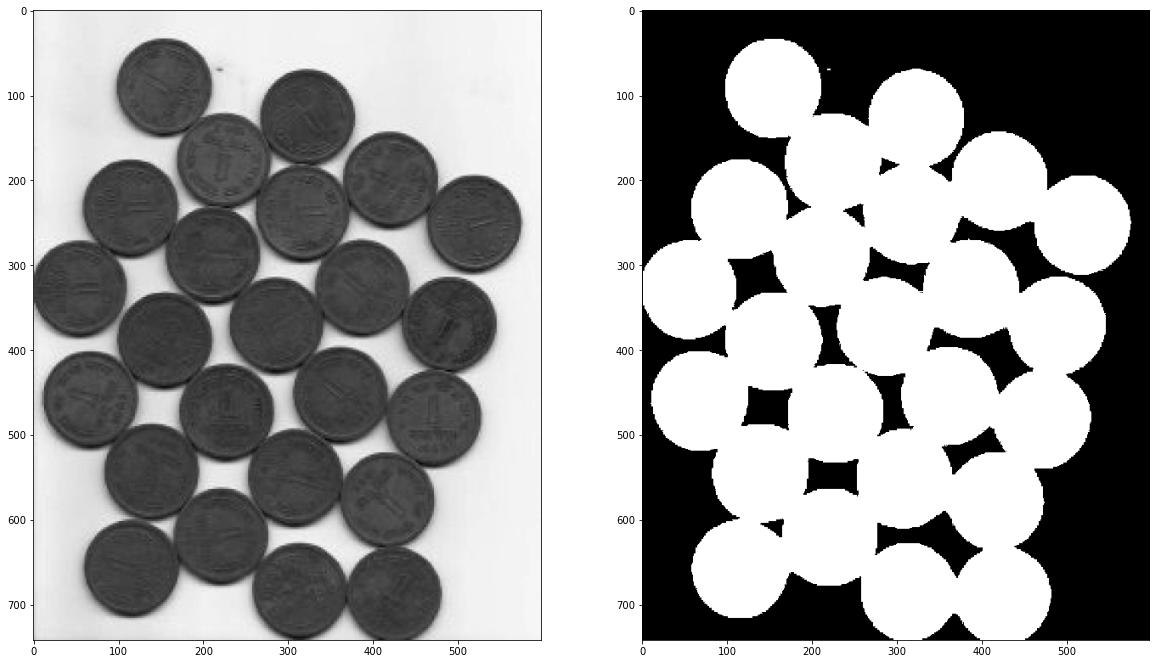

In [3]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(gray, 'gray')
plt.subplot(122), plt.imshow(thresh,'gray')
plt.show()

In [4]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

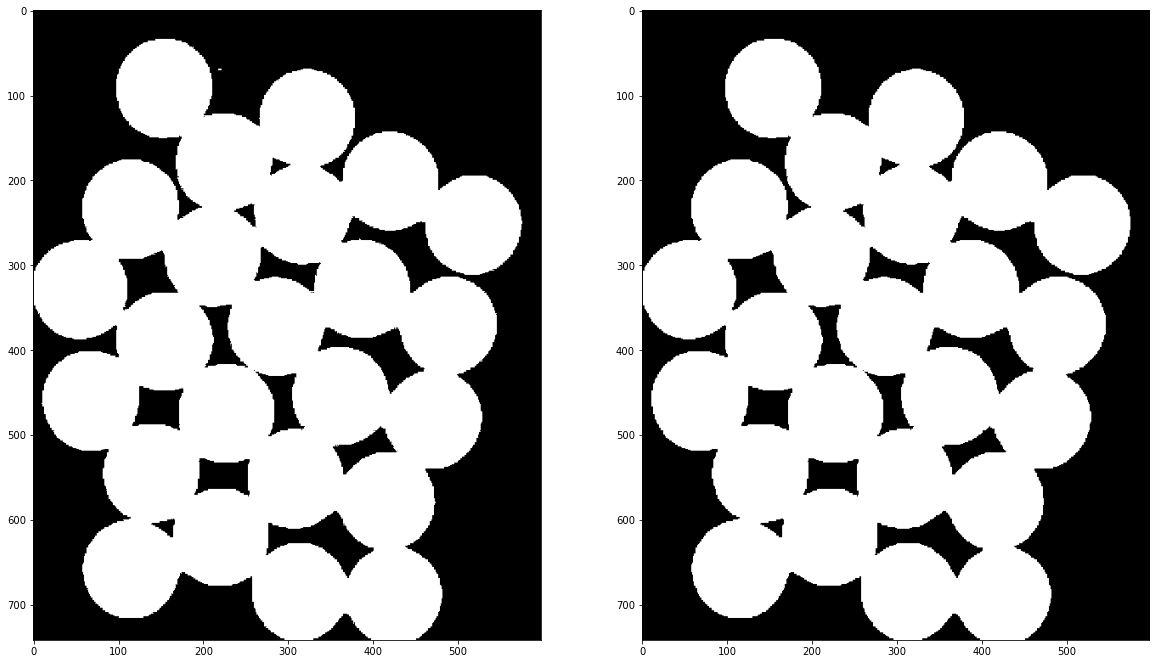

In [5]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(thresh, 'gray')
plt.subplot(122), plt.imshow(opening,'gray')
plt.show()

In [6]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

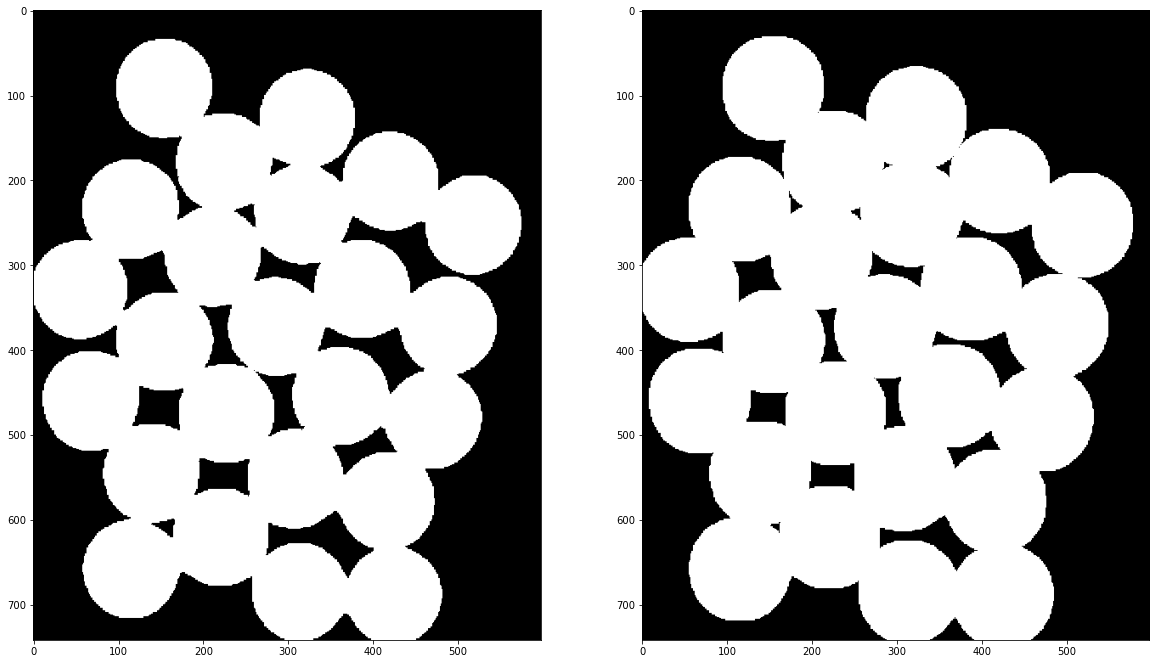

In [7]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(opening, 'gray')
plt.subplot(122), plt.imshow(sure_bg,'gray')
plt.show()

In [9]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

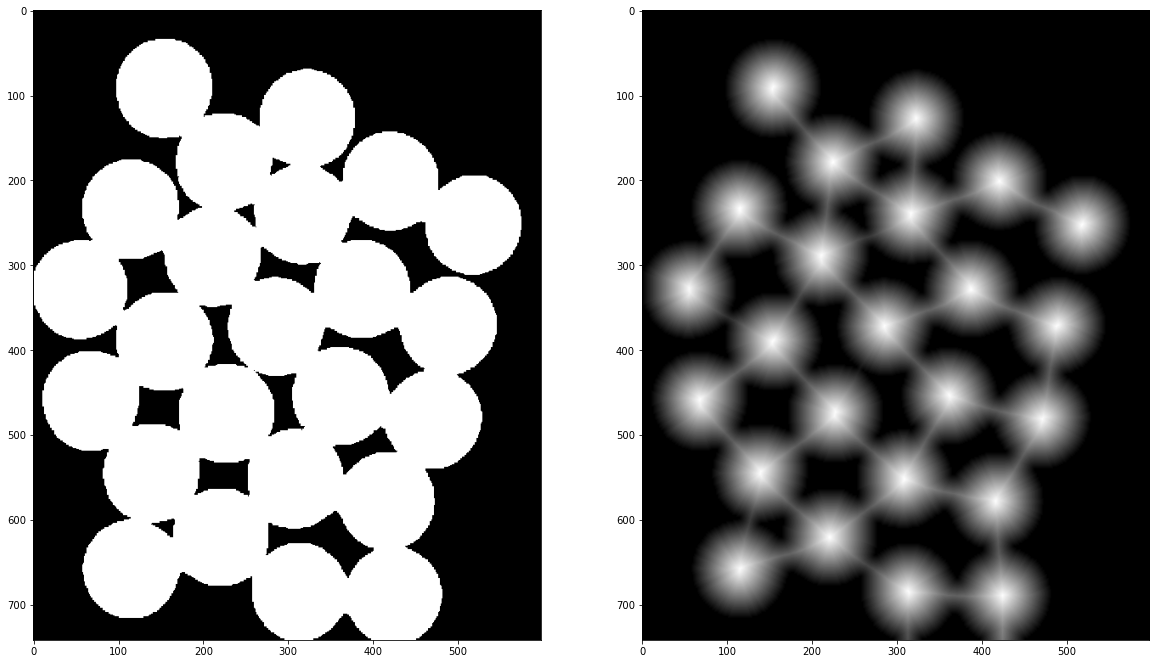

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(opening, 'gray')
plt.subplot(122), plt.imshow(dist_transform,'gray')
plt.show()

In [11]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

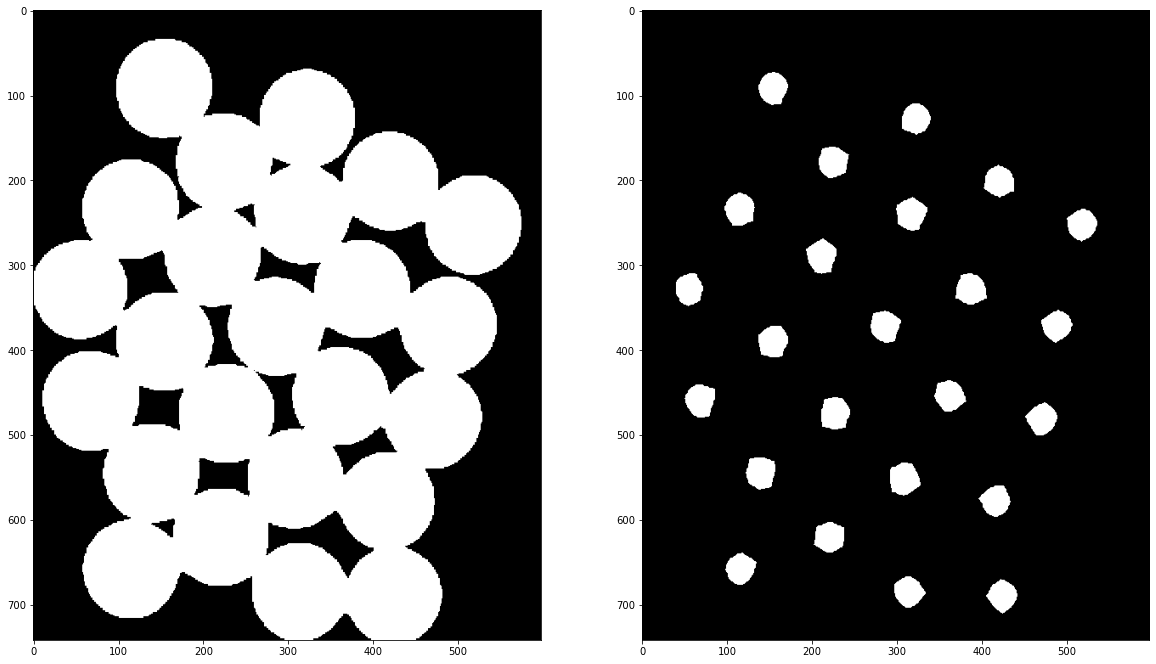

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(opening, 'gray')
plt.subplot(122), plt.imshow(sure_fg,'gray')
plt.show()

In [13]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

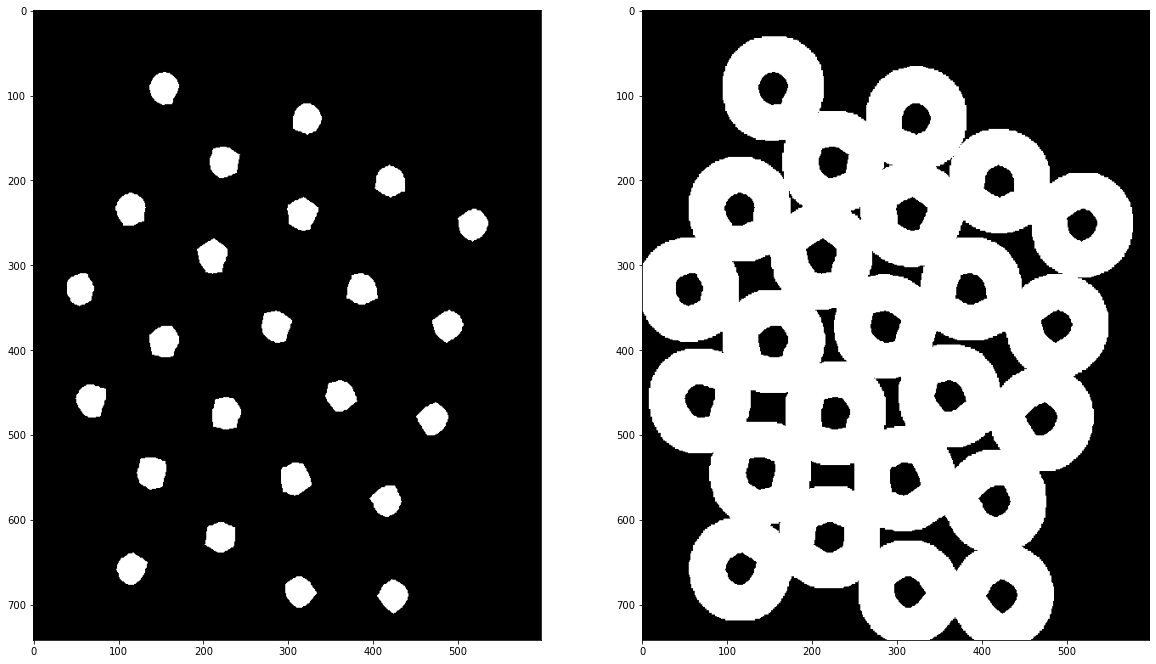

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(sure_fg, 'gray')
plt.subplot(122), plt.imshow(unknown,'gray')
plt.show()

In [18]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

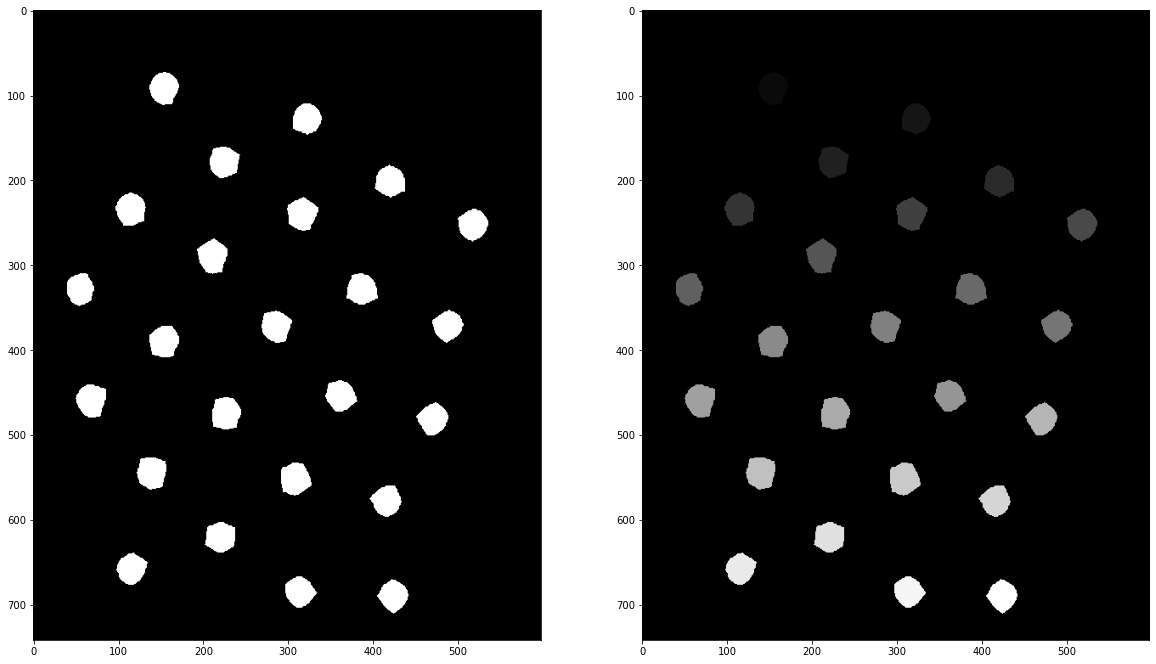

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(sure_fg, 'gray')
plt.subplot(122), plt.imshow(markers,'gray')
plt.show()

In [21]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

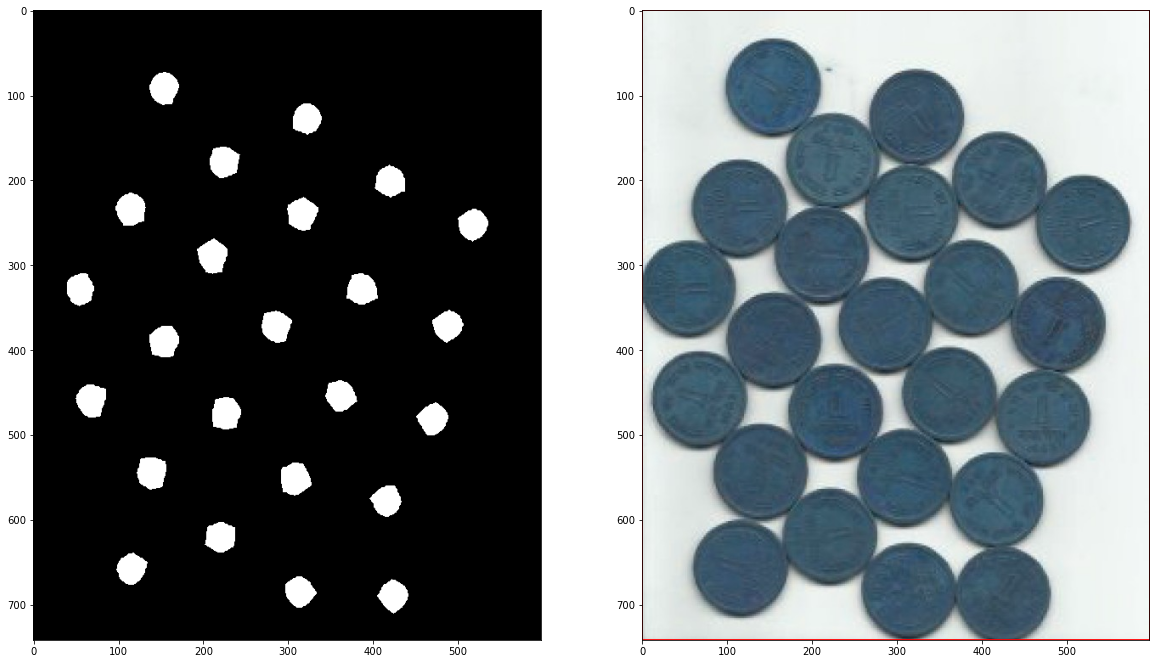

In [25]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(sure_fg, 'gray')
plt.subplot(122), plt.imshow(img,'gray')
plt.show()

# 1.4.16 Interactive Foreground Extraction using GrabCut Algorithm

In [26]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [39]:
img = cv2.imread('dog.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

In [40]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [41]:
rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3]], dtype=uint8),
 array([[2.65708419e-01, 1.99647991e-01, 1.61601643e-01, 1.56820182e-01,
         2.16221766e-01, 7.61462795e+01, 7.84580481e+01, 9.29096931e+01,
         1.59945489e+02, 1.98380400e+02, 2.28312665e+02, 2.61760755e+01,
         3.21243420e+01, 4.48716645e+01, 8.89562290e+01, 1.06900860e+02,
         1.28367939e+02, 1.34272283e+02, 1.60604124e+02, 1.83237553e+02,
         3.40771382e+02, 2.71242447e+02, 2.56936372e+02, 2.71242447e+02,
         2.27610130e+02, 2.19626041e+02, 2.56936372e+02, 2.19626041e+02,
         2.29130286e+02, 1.86714190e+02, 1.61888500e+02, 1.29734940e+02,
         1.61888500e+02, 1.79518094e+02, 1.52053557e+02, 1.29734940e+02,
         1.52053557e+02, 1.38121753e+02, 2.85887106e+01, 3.21868557e+01,
         3.62502242e+01, 3.21868557e+01, 4.6

In [42]:
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

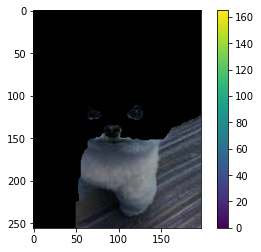

(<matplotlib.image.AxesImage at 0x2a7028bd400>,
 None)

In [44]:
plt.imshow(img),plt.colorbar(),plt.show()

In [46]:
# newmask is the mask image I manually labelled
newmask = cv2.imread('lena.png',0)

In [51]:
# whereever it is marked white (sure foreground), change mask=1
# whereever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 256 but corresponding boolean dimension is 512